<h1><center> DSAI 2201- Assignment I: Data Analysis </center></h1>
<h3><center> Due Date: 02 November 2023 10:00 PM </center></h3>
<h3><center> (50 points total) </center></h3>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name and collaborators:

In [1]:
NAME = " Hafsa Farhan "
COLLABORATORS = ""

## Assignment 1 - Data Analysis
**(15 points total)**

For this assignment, we will analyze the open dataset with data on the passengers aboard the Titanic.

The data file for this assignment can be downloaded from Kaggle website: https://www.kaggle.com/c/titanic/data, file `train.csv`. It is also attached to the assignment page. The definition of all variables can be found on the same Kaggle page, in the Data Dictionary section.

Read the data from the file into pandas DataFrame. Analyze, clean and transform the data to answer the following question: 

**What categories of passengers were most likely to survive the Titanic disaster?**

**Question 1.**  _(4 points)_
* The answer to the main question - What categories of passengers were most likely to survive the Titanic disaster? _(2 points)_
Ans:The highest survival rate was observed among individuals aged 0-16 years. The first bar chart provided illustrates survival rates categorized by age. When it comes to gender, females exhibited a significantly higher survival rate in comparison to males. Our analysis indicates that 72.3% of female passengers survived the crash, whereas only 19% of male passengers survived,shown in the groupby and binning method to see probabilities. Regarding passenger class (Pclass), the data suggests that individuals with higher fare tickets had a better chance of surviving the crash, indicating a prioritization of higher-class passengers over those with lower Pclass tickets. In terms of parental status (Parch), our analysis reveals that having parents on board increased the likelihood of survival. This suggests that parents may have prioritized the safety of their children before their own, which could explain the observed survival rates.

* The detailed explanation of the logic of the analysis _(2 points)_
Data analysis was conducted to explore correlations within the categories of Pclass, Sex, SibSp, and Parch.A histogram was used to examine survival rates in relation to numerical data. Key observations from this analysis included:
1.The majority of boarded passengers fell within the age range of 16-32 years.
2.Passengers aged four years or less had a notably high survival rate.
3.Passengers in the age group of 20-30 years exhibited one of the lowest survival rates.

Further analysis involved correlating numerical and ordinal values with survival rates using a histogram chart. The following insights were gathered:
Pclass=1 showed the highest survival rates.
Pclass=3 had the largest number of passengers but a significantly lower survival rate.
Additionally, a comparison was made between cases where a child was with a parent and cases where a child was with a sibling. The analysis revealed that children had a higher survival rate when accompanied by a sibling, as previously mentioned.

**Question 2.**  _(3 points)_
* What other attributes did you use for the analysis? Explain how you used them and why you decided to use them. 
Ans: Sibsp and Parch were used to determine the survival of a kid with a sibling vs without one as the heatmap showed correlation between these attributes and the survived attribute.I used bar graphs,correlations and groupby mean of survival of these attributes to figure out their relation to survived and what kind of kids survived more.I also used an engineered attribute called fam_size to calculate the size of families that mainly survived through the same methods.
* Provide a complete list of all attributes used.
1.Gender
2.Age
3.Fare
4.Parch
5.Sibsp
6.Pclass
7.fam_size

**Question 3.**  _(5 points)_
* Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
Ans: All techniques and function used to explore the data are shown below this markdown cell,some of the techniques used are heatmaps,bargraphs,binning,feature enginnering,etc.

**Question 4.**  _(3 points)_
* Did you engineer any attributes (created new attributes)? If yes, explain the rationale and how the new attributes were used in the analysis?
Ans:Yes, I've created an attribute called "fam_size." This attribute was made by merging the preexisting attributes "SibSp" and "Parch" to provide an overview of both the total number of families and family counts within the analyzed data.
* If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded.
Ans:I decided to omit the 'PassengerId' and 'Cabin' columns from my analysis since these columns do not contribute any valuable information or assist in determining the survival rate.They can be omitted as there is no correlation between them and the survived attribute.

**Question 5.**  _(5 points)_
* How did you treat missing values for those attributes that you included in the analysis (for example, `age` attribute)? Provide a detailed explanation in the comments.
Ans:The code for this is marked as Q5 and has been commented below as well.From the heatmap,we can see that Age attribute is strongly related to the survived attribute.From checking for nulls in the Age column,it is obseervable that it has a lot of null values.

After this i plotted the Age to see if it has any outliers and because it does have outliers,therefore,the missing null values have been imputed by the median of the age column as the mean is highly sensitive to outliers.It is essential to impute the null values to ensure that our data analysis is not inaccurate,moreover,using the median to impute does not skew the analysis.

In [2]:
import pandas as pd  
import numpy as np
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('train.csv',sep=',')


In [4]:
#This cell for analysing the data through info,head and datatypes
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#To check for duplicates and nulls in the dataframe
for i in df.columns:
    print(df[i].duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: PassengerId, Length: 891, dtype: bool
0      False
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Survived, Length: 891, dtype: bool
0      False
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Pclass, Length: 891, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool
0      False
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Sex, Length: 891, dtype: bool
0      False
1      False
2      False
3      False
4       True
       ...  
886     Tr

In [6]:
df['Age'].isnull() #from the result we can see there are some null values,so we assign them all to a variable to easily replace
null_values=pd.isnull(df['Age'])
null_values#shows the presence of null values
df[null_values].head()
#We can also see that Cabin Attribute comprises of nulls as well

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [7]:
#Now i want to see how many total null values are there in attributes CABIN and AGE in order to replace those values 
df.isnull().sum()
#so the total null values in each attribute are listed below 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

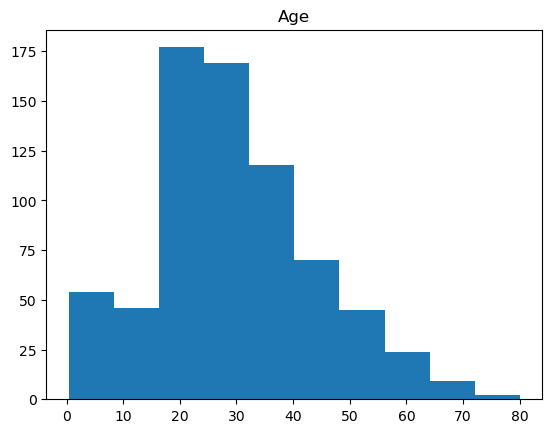

In [8]:
#now i will plot graph of the dataframe to see if it has any outliers to see whether to replace the missing values with mean or median
plt.hist(df['Age'])
plt.title('Age')
plt.show()
#from the plot we can see the data does contain outliers as it is positively skewed

In [9]:
#I will be using median to replace the null values in AGE as outliers do not effect the median
df['Age']=df["Age"].replace(np.NaN,df["Age"].median())
df.isnull().sum() #to check if the changes got made
#Q5

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Now i will be dropping the passenger id and Cabin attributes as they have no logical connection to Survival rate,
#i will be copying the df before making these changes so that the original df does not becoem a mess
df2=df
df2= df2.drop(['PassengerId','Cabin'],axis=1)
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


C:\Users\hafsa\AppData\Local\Temp\ipykernel_14464\2722114414.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True)


<Axes: >

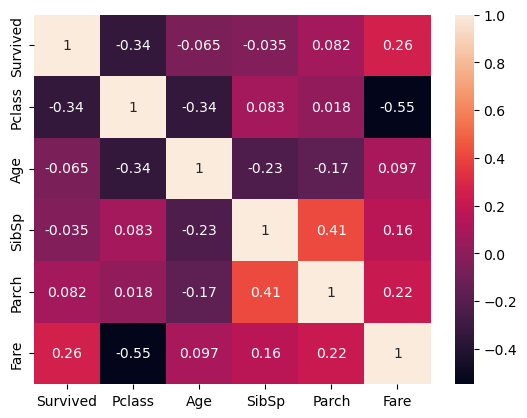

In [26]:
#Now to know exactly which attributes are really related to the survival attribute,i will plot a heatmap showing correlation
sns.heatmap(df2.corr(), annot=True)

#from the graph we can see that Pclass,Age and Sibsp have a negative relationship while Fare and Parch are positively related to survived

In [12]:
# seperate the data into numeric and categorical
df_num = df[['Age','SibSp','Parch','Fare','Survived']]
df_cat = df[['Pclass','Sex','Embarked']]

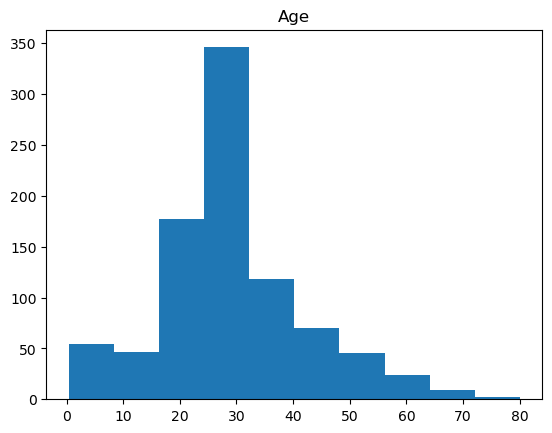

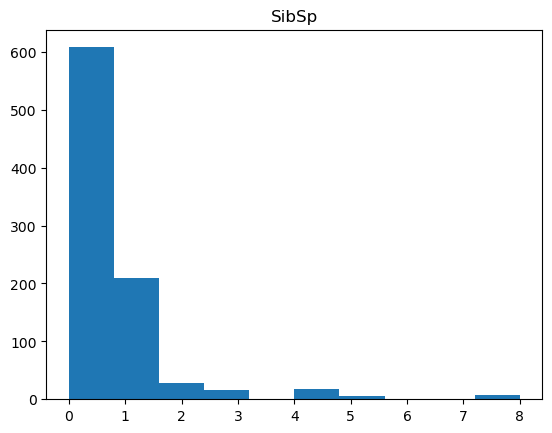

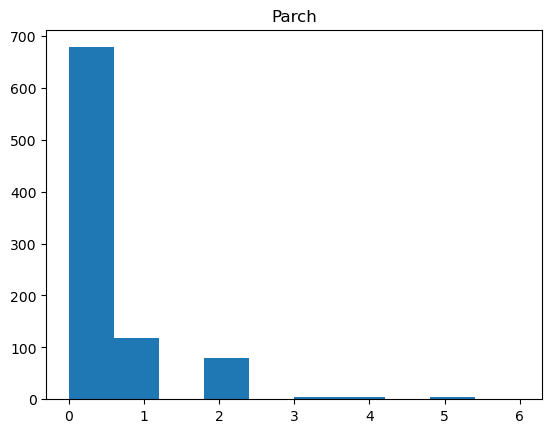

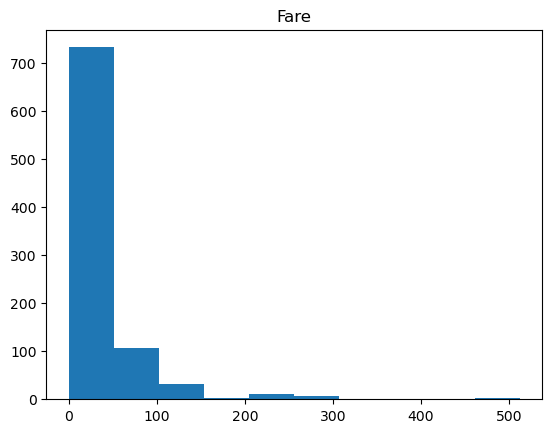

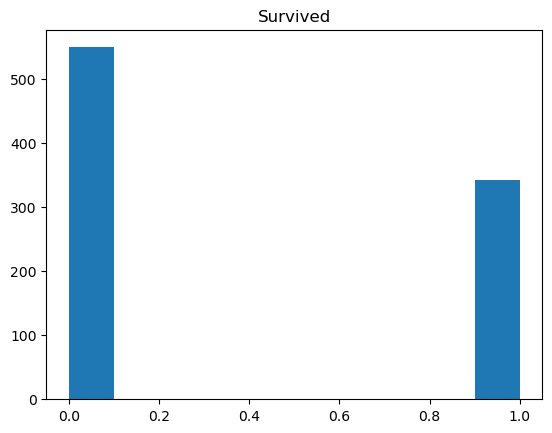

In [13]:
#making bar graphs for the numerical datatypes
for i in df_num.columns:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

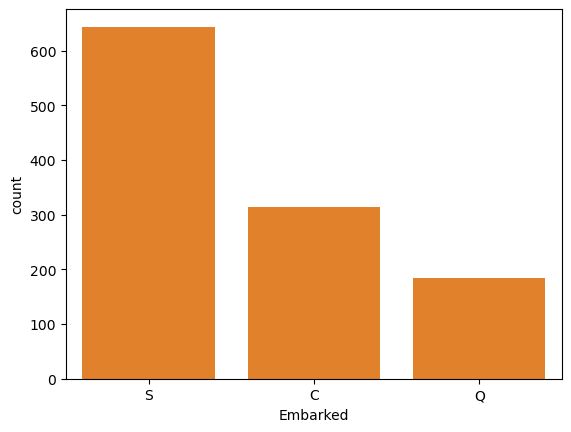

In [14]:
#making bar graphs for categorical datatypes
for i in df_cat.columns:
    base_color = sns.color_palette()[1]
    sns.countplot(data = df_cat, x=df_cat[i],color=base_color,order=df_cat[i].value_counts().index) 
    

<Axes: xlabel='Pclass', ylabel='count'>

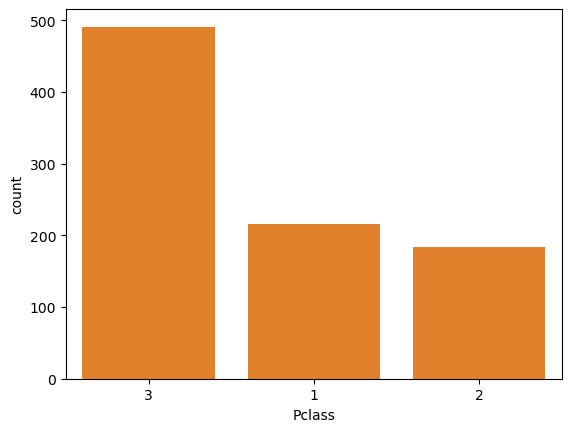

In [15]:
sns.countplot(data = df, x=df['Pclass'],color=base_color,order=df['Pclass'].value_counts().index)

In [17]:
#to see the layout of all the average values with respect to survived and to display it nicely in spreadsheet format
pd.pivot_table(df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'],aggfunc=np.mean)#even by default it calculates the mean

#Individuals with a younger average age of 28 have a higher survival rate compared to older persons. Notably, those who paid higher fares, potentially first-class passengers, had more than twice the survival rate, suggesting that affluence played a role in survival. 
#Individuals listed in the third column with parents had better survival odds, which could indicate that parents prioritized their children's safety over their own. However, children with siblings faced reduced chances of survival.

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.028233,22.117887,0.329690,0.553734
1,28.291433,48.395408,0.464912,0.473684


In [18]:
#To examine the age more,i will make age groups to see which group had a higher probabilty of survival using pd.cut
df['AgeGroupings'] = pd.cut(df['Age'], 5)
df[['AgeGroupings', 'Survived']].groupby(['AgeGroupings'], as_index=False).mean().sort_values(by='AgeGroupings', ascending=True)

#the highest survival rate is for the group of younger kids upto 16 year olds which proves and illustrates our previous findings of there
#being more younger aged survivors
#Q1

,AgeGroupings,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


<Axes: xlabel='Parch', ylabel='Age'>

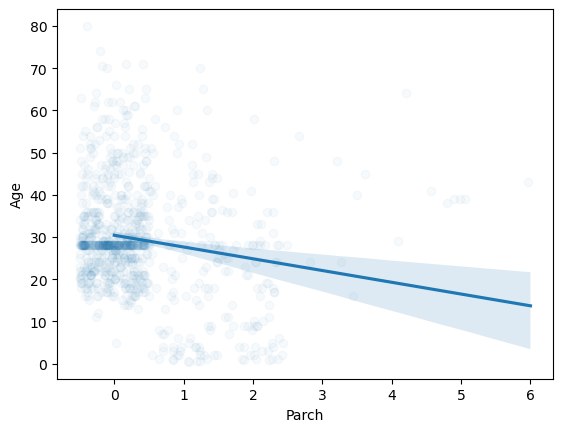

In [19]:
#scatterplot between Parch and Age to show children with parents to stat investigationg relationship between kids,parents and siblings
sns.regplot(data = df, x = 'Parch', y = 'Age',x_jitter = 0.5, scatter_kws = {'alpha' : 1/30})

<Axes: xlabel='SibSp', ylabel='Age'>

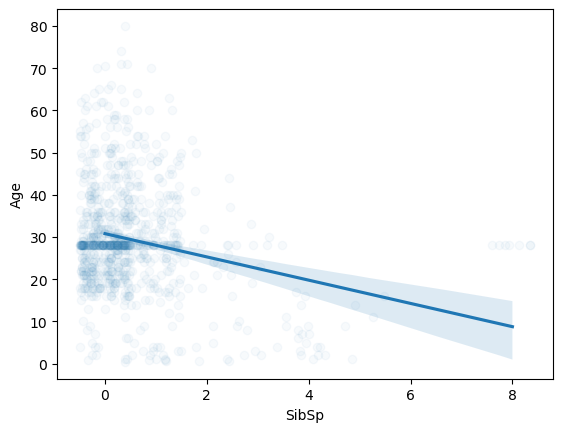

In [20]:
#scatterplot between SibSp and Age to show children with siblings
sns.regplot(data = df, x = 'SibSp', y = 'Age',x_jitter = 0.5, scatter_kws = {'alpha' : 1/30})

In [21]:
print('correlation between age and parch:',df['Age'].corr(df['Parch']))
print('correlation between age and sibsp:',df['Age'].corr(df['SibSp']))

#we found this to see who has abetter chance of survival and from the results it is obvious that kids with parents as opposed to kids with siblings
#have a higher chance of survival

correlation between age and parch: -0.1724819540369488
correlation between age and sibsp: -0.2332963312524889


In [22]:
#Now to find how much of a difference certain characteristics made on survial within each attribute,we will look at their means
#The correlations calculated in the histogram lead us to the conclusion that relationships between the following attributes and survival exists
#we are going to now find out exactly how  survival is affluenced by these attributes

print(df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean())
print('------------------')
print(df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean())
print('------------------')
print(df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean())
print('------------------')
print(df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean())
print('------------------')

#From the result of this code,we can observe that passengers belonging to a higher class,passengers of the female sex,parents with just one child
#and kids with just one sibling have higher chances of survival as opposed to their counterparts

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
------------------
      Sex  Survived
0  female  0.742038
1    male  0.188908
------------------
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
------------------
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
------------------


In [24]:
#over here im creating an attribute called fam_size to see how many whole families survuved the disaster
copy_df = [df]

for data in copy_df:
    data['fam_size'] = data['SibSp'] + data['Parch'] 

df[['fam_size', 'Survived']].groupby(['fam_size'], as_index=False).mean()
#from the result we can see families with three members survived the most followed by a family with two members and singles.

,fam_size,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000
